In [1]:
import pandas as pd

In [2]:

audio_file = 'Dataset/audio_features_dataset_curated.csv'
df_song = pd.read_csv(audio_file)


In [3]:
def get_data_overview(df):
    print('Data overvirew of datasets')
    print('Shape of Datafrmae ',df.shape)
    df.isnull().sum()
    print('columns info',df.columns)
    print("Info",df.info())
    print("Check for null value",df.isnull().sum())
get_data_overview(df_song)

Data overvirew of datasets
Shape of Datafrmae  (43000, 19)
columns info Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   

In [4]:
df_song.dropna(inplace=True)

In [5]:
get_data_overview(df_song)

Data overvirew of datasets
Shape of Datafrmae  (42999, 19)
columns info Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 42999 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          42999 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        42999 non-null  int64  
 5   duration_ms       42999 non-null  int64  
 6   explicit          42999 non-null  bool   
 7   danceability      42999 non-null  float64
 8   energy            42999 non-null  float64
 9   key  

In [6]:
df_audio= df_song.drop(columns=['explicit', 'mode', 'key', 'time_signature', 'popularity'])
df_audio.dropna(inplace=True)

In [7]:
df_audio.head()

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [9]:

import pickle

# Load the saved KMeans model
model_path = 'pickles/kmeans_12.pickle'
with open(model_path, 'rb') as f:
    kmeans_model = pickle.load(f)


In [11]:

from sklearn.preprocessing import StandardScaler

# Select and scale features
features = [
    "duration_ms", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo"
]
X = df_audio[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Predict clusters
df_audio['cluster'] = kmeans_model.predict(X_scaled)



In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=12 ,random_state=42)
kmeans.fit(X_scaled)
pred= kmeans.predict(X_scaled)

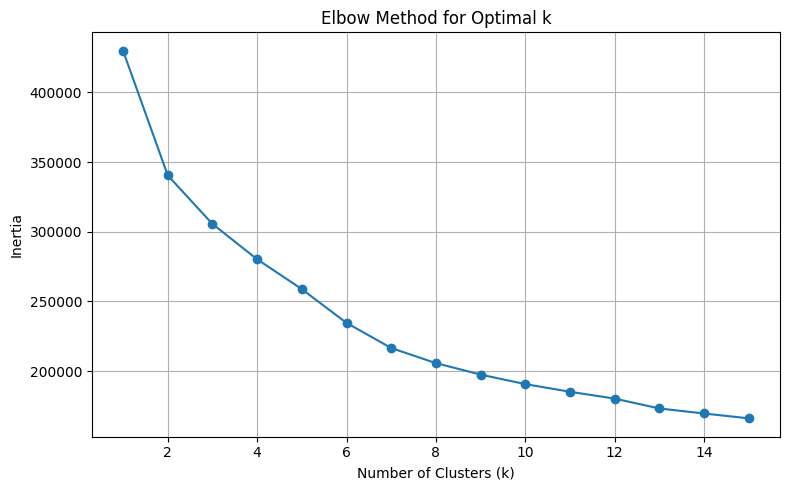

In [18]:
inertia = []

k_range = range(1, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.metrics import silhouette_score
import pickle
import os
# Define the directory name or path
directory_name = "pickles"

# Create the directory
os.makedirs(directory_name, exist_ok=True)

print(f"Directory '{directory_name}' created successfully.")

cluster_range= range(5, 25)
silhouette_scores= []


for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 5)
    cluster_labels = kmeans.fit_predict(X_scaled)
    #pickling
    filename = "pickles/kmeans_" + str(n_clusters) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

Directory 'pickles' created successfully.


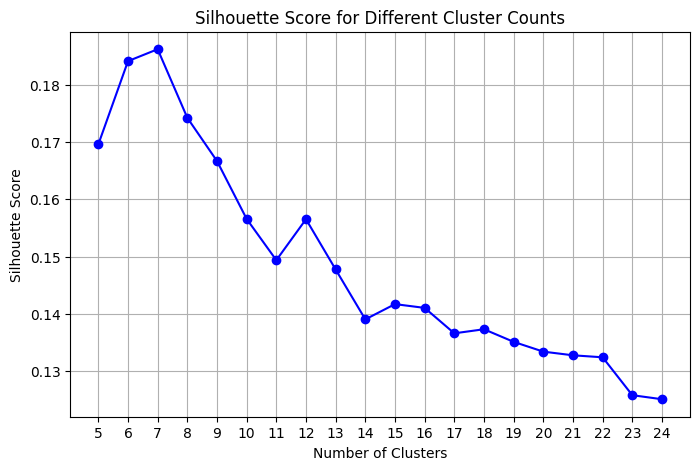

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [22]:
def load(filename = "filename.pickle"): 
    try: 
        with open("pickles/"+filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [23]:
kmeans12 = load("kmeans_12.pickle")


In [24]:
kmeans12.predict(X_scaled)

array([5, 7, 7, ..., 2, 3, 2], shape=(42999,), dtype=int32)

In [12]:
df_audio['cluster']

0        5
1        7
2        7
3        7
4        2
        ..
42995    1
42996    1
42997    2
42998    3
42999    2
Name: cluster, Length: 42999, dtype: int32

In [13]:

# Map clusters to descriptive labels
cluster_labels = {
    0: "Chill Vibes",
    1: "High Energy",
    2: "Rock",
    3: "Chill Vibes",
    4: "High Energy",
    5: "Rock",
    6: "Chill Vibes",
    7: "High Energy",
    8: "Rock",
    9: "Chill Vibes",
    10: "High Energy",
    11: "Rock"
}
df_audio['label'] = df_audio['cluster'].map(cluster_labels)


In [14]:
df_audio

,track_id,artists,album_name,track_name,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,label
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,5,Rock
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,7,High Energy
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,7,High Energy
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,7,High Energy
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,2,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,384999,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,1,High Energy
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,385000,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,1,High Energy
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,271466,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,2,Rock
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,283893,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,3,Chill Vibes
